This notebook contains various examples of fitting curves to data.
- scipy.stats.linregress
- numpy.polyfit
- scipy.optimize.curve_fit

Date Created: 23 Sep 2017
<br>
Last Modified: 2 May 2019
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1.0 scipy.stats.linregress

Official documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
- Fits data to straight line.
- Returns $r^2$ value of the fit and other measures of regression goodness.
<br>
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [21]:
import scipy.stats as stats

In [22]:
# Generate some synthetic data
num_points = 10
x = np.arange(0,num_points)
y = x + np.random.rand(num_points)*3

In [23]:
# Fit a straight line
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(slope, intercept)

0.985061100463 1.68523855245


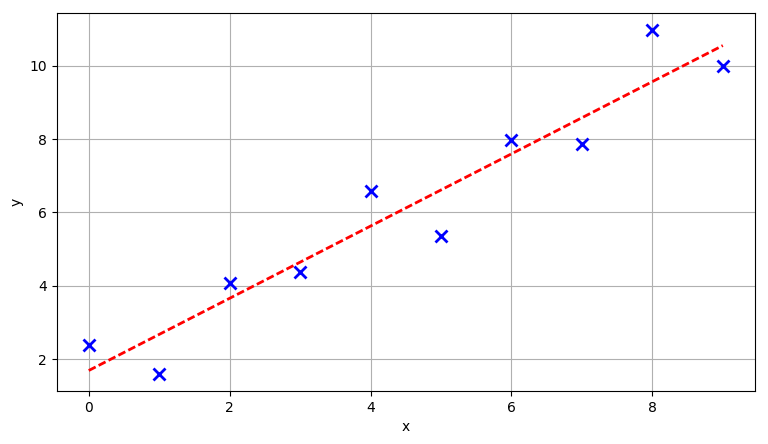

In [24]:
# Plot the data and the fitted function
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(x, y, 'x', mew=2, ms=8, color='blue')
ax.plot(x, x*slope + intercept, ls='--', color='red', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
plt.show()

In [25]:
print('r^2: %.2f' % r_value)
print('p-value: %e' % p_value)

r^2: 0.96
p-value: 1.396152e-05


# 2.0 numpy.polyfit
Official Documentation: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
- Fits data to polynoimals.
- Can handle fitting with error bars.
- Faster than scipy.optimize.curve_fit but can only fit for polynomials.

### Fitting with error bars

In [8]:
# Generate some synthetic data
num_points = 10
x = np.linspace(0, 10, num_points)

# Errors in y
dy_std = 3*np.random.rand(num_points) + 1
dy = dy_std * np.random.randn(num_points) + 0

# This is our data
y = x + dy

In [9]:
# Do the fitting - note the star for unpacking returned things

coeff, *stats = np.polyfit(x, y, deg=1, w=1/dy_std, full=True)

# Fitted function
y_fit = coeff[0]*x + coeff[1]

print(coeff)
print(stats)

[ 1.19047162 -1.611951  ]
[array([ 2.13705079]), 2, array([ 1.36353458,  0.37519788]), 2.2204460492503131e-15]


In [10]:
# Compare with unweighted fit
coeff, *stats = np.polyfit(x, y, deg=1, full=True)

# Fitted function
y_fitUnweighted = coeff[0]*x + coeff[1]

print(coeff)
print(stats)

[ 1.25607246 -1.47338721]
[array([ 15.88766653]), 2, array([ 1.35754456,  0.39632407]), 2.2204460492503131e-15]


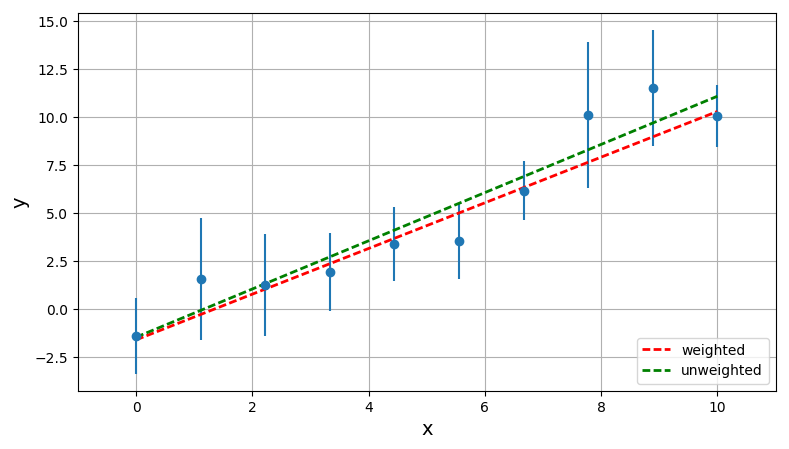

In [11]:
# Plot the data and the fitted function
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=1*dy_std, fmt='o')
ax.plot(x, y_fit, color='red', linestyle='dashed', linewidth=2, label='weighted')
ax.plot(x, y_fitUnweighted, color='green', linestyle='dashed', linewidth=2, label='unweighted')
ax.set_xlim(left=-1, right=11)
ax.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc='lower right')
plt.show()

### Fitting a polynomial with deg > 1

In [31]:
# Generate some synthetic data
data_len = 10
x = np.linspace(0, 10, data_len)

# This is our data
noise = (np.random.rand(data_len) - 0.5)*50
y = x**2 + 3*x - 1 + noise

In [32]:
coeff, *stats = np.polyfit(x, y, deg=2, full=True)
print(coeff)
print(stats)

p = np.poly1d(coeff)
y_fit = p(x)

[ 0.90448172  2.89044123  6.23252733]
[array([ 1212.14370024]), 3, array([ 1.64219501,  0.53895301,  0.11280603]), 2.2204460492503131e-15]


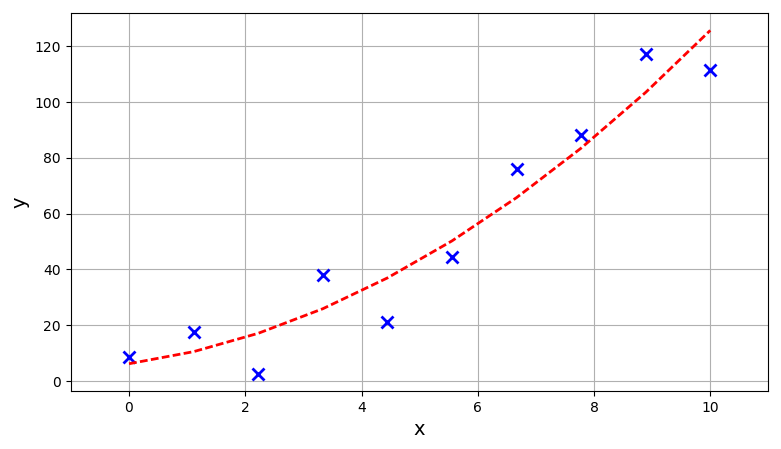

In [33]:
# Plot the data and the fitted function
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(x, y, 'x', mew=2, ms=8, color='blue')
ax.plot(x, y_fit, color='red', linestyle='dashed', linewidth=2, label='weighted')
ax.set_xlim(left=-1, right=11)
ax.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

# 3.0 scipy.optimize.curve_fit
Official Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
- General - Can fit data to any function.
- Iterative methods - may be slow and might not converge.

In [15]:
# Generate some synthetic data
sigma = 3
mu = 10
num_samples = 1000

s = sigma * np.random.randn(num_samples) + mu

In [16]:
# Make a histogram
num_bin = 20
hist, bin_edges = np.histogram(s, bins=num_bin)

bin_center = (bin_edges[:-1] + bin_edges[1:]) / 2

x = bin_center
y = hist
print(x)
print(y)

[  1.47700304   2.42733953   3.37767603   4.32801252   5.27834901
   6.2286855    7.17902199   8.12935848   9.07969498  10.03003147
  10.98036796  11.93070445  12.88104094  13.83137743  14.78171393
  15.73205042  16.68238691  17.6327234   18.58305989  19.53339638]
[  2   3  13  24  37  64  72 116 125 125 101 101  93  52  32  19  13   6
   1   1]


In [17]:
from scipy.optimize import curve_fit

# Define a Gaussian function
def func(x, A, mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

# Supply an intial guess.
# Parameter A should be close to the maximum of the data
# Parameter mu should be close to the mean of the data
# Parameter sigma should be close to the standard deviation of the data
initial_guess = [np.max(y), np.mean(y), np.std(y)]

# Do the fitting
p_opt, p_cov = curve_fit(func, x, y, p0=initial_guess, maxfev=1000)

print(p_opt)
print(p_cov)

[ 124.5657397     9.92074373    3.0626339 ]
[[  1.28278320e+01   1.58056703e-04  -2.10686288e-01]
 [  1.58056703e-04   1.03342778e-02  -8.74348625e-06]
 [ -2.10686288e-01  -8.74348625e-06   1.03636993e-02]]


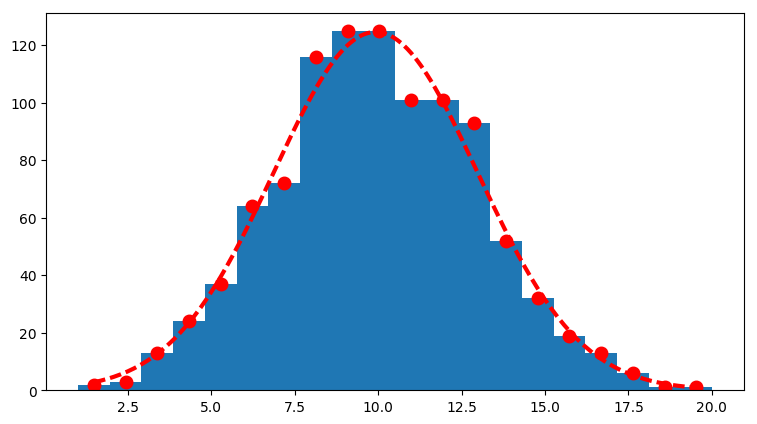

In [18]:
# Plot the results
x_plot = np.arange(np.min(x),np.max(x),0.1)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.hist(s, bins=num_bin)
ax.plot(x, y, 'o', mew=2, markersize=8, color='red')
ax.plot(x_plot, func(x_plot, *p_opt), linewidth=3, color='red', linestyle='dashed')
plt.show()